In [1]:
import os
import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
import tensorflow as tf
tf.set_random_seed(123)
import keras
from keras.layers import Dense, Input, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.utils import plot_model
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#%matplotlib inline

Using TensorFlow backend.


ImportError: No module named 'seaborn'

In [2]:
import os
import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
import tensorflow as tf
tf.set_random_seed(123)
import keras
from keras.layers import Dense, Input, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.utils import plot_model
#import seaborn as sns
#sns.set_style("whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

NameError: name 'sns' is not defined

In [3]:
import os
import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
import tensorflow as tf
tf.set_random_seed(123)
import keras
from keras.layers import Dense, Input, LeakyReLU, Dropout
from keras.models import Sequential, Model
from keras.utils import plot_model
#import seaborn as sns
#sns.set_style("whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
tf.reset_default_graph()
keras.backend.clear_session()

#获取数据
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data", one_hot=True)
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
#超参数
pixel_size = 28
#随机噪声维数,测试生成模型
n_z = 256
z_test = np.random.uniform(-1.0,1.0,size=[8,n_z])
#学习率
g_learning_rate = 0.00001
d_learning_rate = 0.01
#图像的像素
n_x = 784
#生成器和判别器隐藏层数
g_n_layers = 3
d_n_layers = 1
#每个隐藏层的神经元
g_n_neurons = [256, 512, 1024]
d_n_neurons = [256]
n_epochs = 400
batch_size = 100
n_batches = int(mnist.train.num_examples / batch_size)
n_epochs_print = 50

In [6]:
#归一化
def norm(x):
    return (x-0.5)/0.5
#展示图像
def display_images(images):
    for i in range(images.shape[0]):
        plt.subplot(1, 8, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()



#定义生成器
g_model = Sequential()
g_model.add(Dense(units=g_n_neurons[0], input_shape=(n_z,),name='g_0'))
g_model.add(LeakyReLU())
for i in range(1,g_n_layers):
    g_model.add(Dense(units=g_n_neurons[i],name='g_{}'.format(i)))
    g_model.add(LeakyReLU())
g_model.add(Dense(units=n_x, activation='tanh',name='g_out'))
print('生成器:')
g_model.summary()
g_model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=g_learning_rate))

#定义判别器
d_model = Sequential()
d_model.add(Dense(units=d_n_neurons[0],  input_shape=(n_x,),name='d_0'))
d_model.add(LeakyReLU())
d_model.add(Dropout(0.3))
for i in range(1,d_n_layers):
    d_model.add(Dense(units=d_n_neurons[i], name='d_{}'.format(i)))
    d_model.add(LeakyReLU())
    d_model.add(Dropout(0.3))
d_model.add(Dense(units=1, activation='sigmoid',name='d_out'))
print('判别器:')
d_model.summary()

生成器:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
g_0 (Dense)                  (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
g_1 (Dense)                  (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
g_2 (Dense)                  (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
g_out (Dense)                (None, 784)               803600    
Total

In [7]:
d_model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=d_learning_rate) )


In [8]:
d_model.trainable=False
z_in = Input(shape=(n_z,),name='z_in')
x_in = g_model(z_in)
gan_out = d_model(x_in)
gan_model = Model(inputs=z_in,outputs=gan_out,name='gan')
print('GAN:')
gan_model.summary()

GAN:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_in (InputLayer)            (None, 256)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1526288   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 201217    
Total params: 1,727,505
Trainable params: 1,526,288
Non-trainable params: 201,217
_________________________________________________________________


In [9]:
plot_model(gan_model,'02_1_simplegan.png')


In [10]:

gan_model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=g_learning_rate) )


epoch: 0000   d_loss = 0.484067  g_loss = 0.908856


/anaconda2/envs/darkflow/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


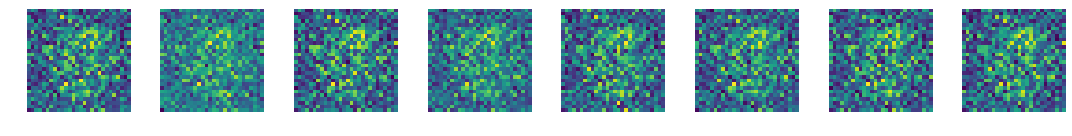

epoch: 0050   d_loss = 0.505702  g_loss = 1.390715


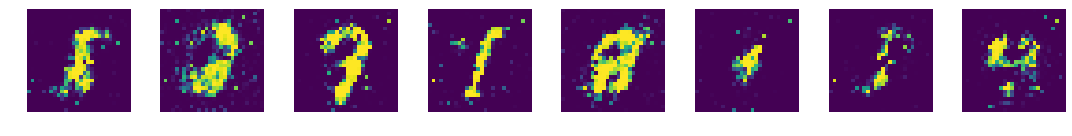

epoch: 0100   d_loss = 0.543719  g_loss = 1.254722


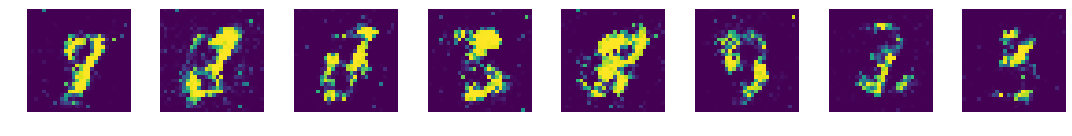

epoch: 0150   d_loss = 0.598423  g_loss = 1.077127


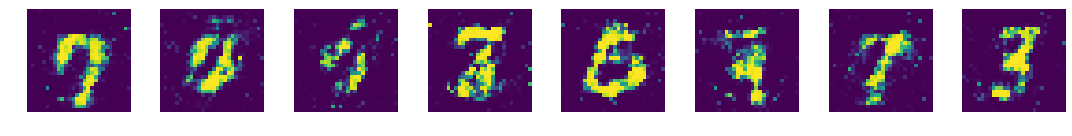

epoch: 0200   d_loss = 0.625411  g_loss = 0.949968


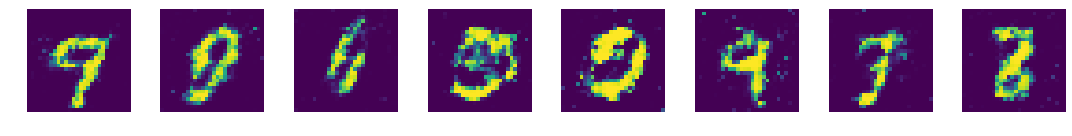

epoch: 0250   d_loss = 0.656321  g_loss = 0.832092


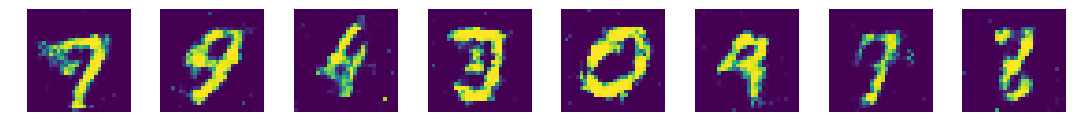

epoch: 0300   d_loss = 0.665157  g_loss = 0.803736


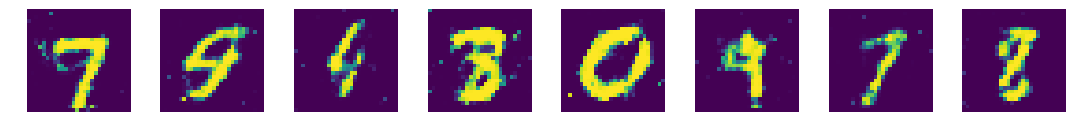

epoch: 0350   d_loss = 0.668037  g_loss = 0.790451


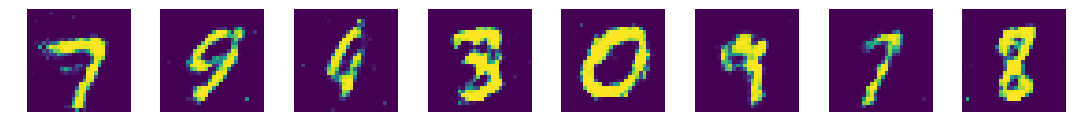

epoch: 0400   d_loss = 0.671039  g_loss = 0.777429


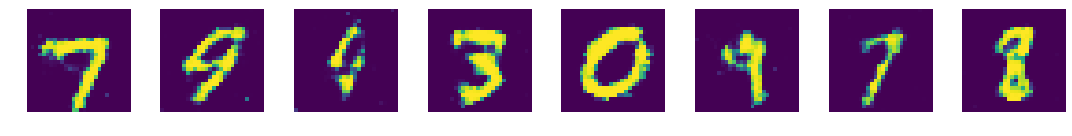

In [11]:
for epoch in range(n_epochs+1):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    for batch in range(n_batches):
        x_batch, _ = mnist.train.next_batch(batch_size)
        #真实数据
        x_batch = norm(x_batch)
        z_batch = np.random.uniform(-1.0,1.0,size=[batch_size,n_z])
        #生成网络产生的数据
        g_batch = g_model.predict(z_batch)
        
        x_in = np.concatenate([x_batch,g_batch])
        
        y_out = np.ones(batch_size*2)
        #真假图像的标签设置为0.9 0.1
        y_out[:batch_size]=0.9
        y_out[batch_size:]=0.1
        
        d_model.trainable=True
        batch_d_loss = d_model.train_on_batch(x_in,y_out)

        z_batch = np.random.uniform(-1.0,1.0,size=[batch_size,n_z])
        x_in=z_batch
        
        y_out = np.ones(batch_size)
            
        d_model.trainable=False
        batch_g_loss = gan_model.train_on_batch(x_in,y_out)
        
        epoch_d_loss += batch_d_loss 
        epoch_g_loss += batch_g_loss 
    if epoch%n_epochs_print == 0:
        average_d_loss = epoch_d_loss / n_batches
        average_g_loss = epoch_g_loss / n_batches
        print('epoch: {0:04d}   d_loss = {1:0.6f}  g_loss = {2:0.6f}'.format(epoch,average_d_loss,average_g_loss))
        #使用已经训练的生产器预测图像         
        x_pred = g_model.predict(z_test)
        display_images(x_pred.reshape(-1,pixel_size,pixel_size))